['I', 'like', 'Machine', 'Learning.']
['I', 'like', 'TensorFlow.']
['I', 'prefer', 'Python.']
co_occurence_matrix follows:
[[0. 1. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 2. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]]


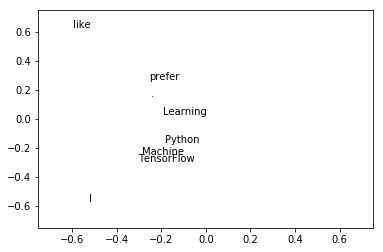

In [3]:
import numpy as np
import matplotlib.pyplot as plt

corpus = ['I like Machine Learning.', 'I like TensorFlow.', 'I prefer Python.']

corpus_words_unique = set()

corpus_processed_docs = []
for doc in corpus:
    corpus_words_ = []
    corpus_words = doc.split()
    print(corpus_words)
    for x in corpus_words:
        if len(x.split('.')) == 2:
            corpus_words_ += [x.split('.')[0]] + ['.']
        else:
            corpus_words_ += x.split('.')
    corpus_processed_docs.append(corpus_words_)
    corpus_words_unique.update(corpus_words_)

corpus_words_unique = np.array(list(corpus_words_unique))

co_occurence_matrix = np.zeros((len(corpus_words_unique), len(corpus_words_unique)))
for corpus_words_ in corpus_processed_docs:
    for i in range(1, len(corpus_words_)):
        index_1 = np.argwhere(corpus_words_unique == corpus_words_[i])
        index_2 = np.argwhere(corpus_words_unique == corpus_words_[i - 1])

        co_occurence_matrix[index_1, index_2] += 1
        co_occurence_matrix[index_2, index_1] += 1

U, S, V = np.linalg.svd(co_occurence_matrix, full_matrices=False)
print('co_occurence_matrix follows:')
print(co_occurence_matrix)


for i in range(len(corpus_words_unique)):
    plt.text(U[i, 0], U[i, 1], corpus_words_unique[i])
plt.xlim((-0.75, 0.75))
plt.ylim((-0.75, 0.75))
plt.show()
